# Sitographie

* Sur [Interstices](https://interstices.info):
    * <https://interstices.info/le-probleme-du-sac-a-dos/>
    * <https://interstices.info/le-plus-court-chemin/>
    * <https://interstices.info/routage-dans-les-petits-mondes/>
    * <https://interstices.info/le-probleme-du-voyageur-de-commerce/>
* Sur Culture Maths :
    * <https://culturemath.ens.fr/thematiques/lycee/algorithmes-gloutons>

# Rendu de monnaie

## Cas de sommes entières

In [29]:
EURO = [1, 2, 5, 10, 20, 50, 100, 200, 500]

def rendu_monnaie_1(s, P):
    i  = len(P) - 1
    rendu = []
    while s > 0 and i >= 0:
        if P[i] <= s:
            s = s - P[i]
            rendu.append(P[i])
        else:
            i = i - 1
    return rendu

#tests unitaires 
assert rendu_monnaie_1(49, EURO)  == [20, 20, 5, 2, 2]
assert rendu_monnaie_1(76, EURO) == [50, 20, 5, 1]

In [30]:
EURO_COMPLET = [0.01, 0.02, 0.05, 0.10, 0.20, 0.50, 1, 2, 5, 10, 20, 50, 100, 200, 500]

Problèmes d'approximation avec les flottants !

In [31]:
rendu_monnaie_1(13.45, EURO_COMPLET)

[10, 2, 1, 0.2, 0.2, 0.02, 0.02]

In [32]:
13.45 - 10

3.4499999999999993

In [33]:
13 + 0.4 + 0.05

13.450000000000001

On adapte en comptant en centimes !

In [34]:
def rendu_monnaie_2(s, P):
    return [r // 100 if r >= 100 else r / 100 for r  in rendu_monnaie_1(s * 100, [e * 100 for e in P])]


In [35]:
rendu_monnaie_2(13.45, EURO_COMPLET)

[10, 2, 1, 0.2, 0.2, 0.05]

In [36]:
rendu_monnaie_2(25.58, EURO_COMPLET)

[20, 5, 0.5, 0.05, 0.02, 0.01]

L'ancier  système monétaire impérial anglais n'était pas canonique !

In [38]:
IMPERIAL = [1,3,6,12,24,30]
rendu_monnaie_2(49, IMPERIAL)

[30, 12, 6, 1]

# Placement de pylones

In [ ]:
def alpha(i, k):
    assert k > i
    return (L_h[k] + delta  - (L_h[i] + l)) / (k - i)

In [39]:
def beta(i, j):
    assert j > i
    return (L_h[j] + l  - (L_h[i] + l)) / (j - i)

In [40]:
def respecte_legislation(i, j):
    b = beta(i, j)
    for k in range(i + 1, j):
        if b < alpha(i, k):
            return False
    return True

In [41]:


def strategie_glouton_avant():
    """Complexité en O(n**2)   si on majore 
    respecte_legislation(dernier, prochain) par C * n"""
    n = len(L_h) - 1
    pylones = [0]
    dernier = 0
    prochain = dernier + 1
    while prochain <= n:
        if prochain != n and respecte_legislation(dernier, prochain):
            prochain = prochain + 1
        elif prochain != n:
            pylones.append(prochain - 1)
            dernier = prochain - 1
        else:
            pylones.append(prochain)
            prochain = prochain + 1
    return pylones


def strategie_glouton_au_plus_loin():
    """Complexité en O(n**2)   si on majore 
    respecte_legislation(dernier, prochain) par C * n"""
    n = len(L_h) - 1
    pylones = [0]
    dernier = 0
    prochain = n
    while dernier < n:
        if respecte_legislation(dernier, prochain):
            dernier = prochain
            prochain = n
        else:
            prochain = prochain - 1
    return pylones


# Problème du sac à dos

In [2]:
import csv # import du module
f = open('videos.csv', mode = 'r', encoding = 'utf8', newline = '')
reader = csv.DictReader(f, delimiter = ',') #création d'un objet reader
table_video = [dict(enregistrement) for enregistrement in reader]
f.close()
table_video

[{'Fichier': 'Vidéo 1', 'Durée': '114', 'Taille': '4570'},
 {'Fichier': 'Vidéo 2', 'Durée': '32', 'Taille': '630'},
 {'Fichier': 'Vidéo 3', 'Durée': '20', 'Taille': '1650'},
 {'Fichier': 'Vidéo 4', 'Durée': '4', 'Taille': '85'},
 {'Fichier': 'Vidéo 5', 'Durée': '18', 'Taille': '2150'},
 {'Fichier': 'Vidéo 6', 'Durée': '80', 'Taille': '2710'},
 {'Fichier': 'Vidéo 7', 'Durée': '5', 'Taille': '320'}]

In [5]:
csv.DictReader??

In [6]:
def incrementation_binaire(tableau_bits):
    copie = tableau_bits[:]
    k = len(tableau_bits) - 1
    while k >= 0 and copie[k] != 0:
        copie[k] = 0
        k = k - 1
    copie[k] = 1
    return copie

def liste_parties(n):
    """Renvoie la liste des parties 
    d'un ensemble à n éléments codées en binaire"""    
    dernier = [0] * n
    liste = [dernier]
    for k in range(2 ** n - 1):
        dernier = incrementation_binaire(dernier)
        liste.append(dernier)
    return liste

def somme_tab(t):
    s = 0
    for e in t:
        s = s + e
    return s

def force_brute(fichiers, taille_max):
    n = len(fichiers)
    parties = liste_parties(n)
    selection_max =  [f for f in fichiers if float(f['Taille']) <= taille_max][0]
    duree_max =  float(selection_max['Durée'])
    for p in parties:
        selection = [fichiers[k] for k in range(n) if p[k] == 1]
        duree = somme_tab([float(f['Durée']) for f in selection])
        taille = somme_tab([float(f['Taille']) for f in selection])
        if taille <= taille_max and duree > duree_max:
            selection_max = selection
            duree_max = duree
    return duree_max, selection_max
        

In [7]:
liste_parties(3)

[[0, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 1, 0],
 [1, 1, 1]]

In [8]:
force_brute(table_video, 8000)

(230.0,
 [{'Fichier': 'Vidéo 1', 'Durée': '114', 'Taille': '4570'},
  {'Fichier': 'Vidéo 2', 'Durée': '32', 'Taille': '630'},
  {'Fichier': 'Vidéo 4', 'Durée': '4', 'Taille': '85'},
  {'Fichier': 'Vidéo 6', 'Durée': '80', 'Taille': '2710'}])

In [1]:
def gloutons(fichiers, taille_max):
    i = 0
    taille = 0
    duree = 0
    n = len(fichiers)
    selection = []
    while taille <= taille_max and i < n:
        taille_fichier = float(fichiers[i]['Taille'])
        if taille + taille_fichier <= taille_max:
            taille = taille + taille_fichier
            selection.append(fichiers[i]['Fichier'])
            duree = duree + float(fichiers[i]['Durée'])
        i = i + 1
    return duree, selection

In [3]:
gloutons(sorted(table_video, key = lambda f : float(f['Taille'])), 5000)

(79.0, ['Vidéo 4', 'Vidéo 7', 'Vidéo 2', 'Vidéo 3', 'Vidéo 5'])

In [4]:
gloutons(sorted(table_video, key = lambda f : float(f['Durée'])/float(f['Taille']), reverse = True), 5000)

(121.0, ['Vidéo 2', 'Vidéo 4', 'Vidéo 6', 'Vidéo 7'])

In [5]:
gloutons(sorted(table_video, key = lambda f : float(f['Durée']), reverse = True), 5000)

(123.0, ['Vidéo 1', 'Vidéo 7', 'Vidéo 4'])

# Problème de planning

In [1]:
import matplotlib.pyplot as plt
import random

In [2]:
def echantillon(binf, bsup, n):
    assert binf < bsup
    t = []
    for _ in range(n):
        duree = 0
        while duree == 0:
            duree = random.randint(0, bsup - binf)
        debut = random.randint(binf, bsup - duree)
        t.append([debut, debut + duree])
    return t

In [46]:
echantillon(8, 18, 10)

[[9, 16],
 [14, 18],
 [14, 16],
 [16, 18],
 [8, 18],
 [12, 13],
 [14, 16],
 [9, 10],
 [10, 16],
 [8, 16]]

In [3]:
def graphique(echantillon, solution = []):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.grid(True)
    ax.set_yticks([])
    ax.set_xlabel('Temps')
    ax.set_title("Demandes de réservation")
    n = len(echantillon)
    for k in range(n):
        debut, fin = echantillon[k]
        if echantillon[k] in solution:
            plt.plot([debut, fin], [k + 1,k + 1], linewidth=2, marker = 'o')
        else:
            plt.plot([debut, fin], [k + 1,k + 1], linewidth=2, linestyle='dashed', marker = 'o')
    plt.show()

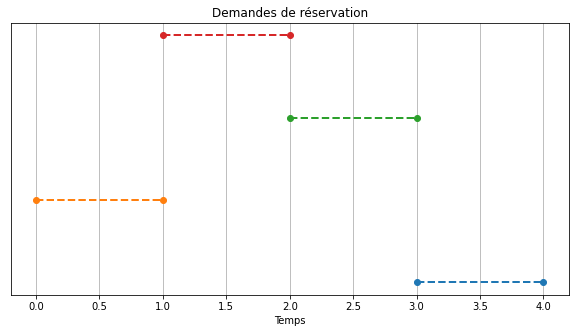

In [4]:
graphique([[3,4], [0,1], [2,3], [1,2]])

In [ ]:
graphique([[3,4], [0,1], [2,3], [1,2]])

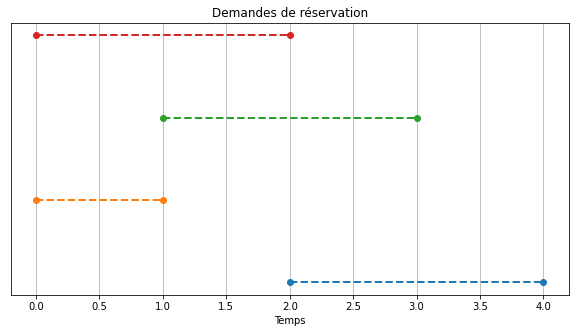

In [6]:
graphique([[2,4], [0,1], [1,3], [0,2]])

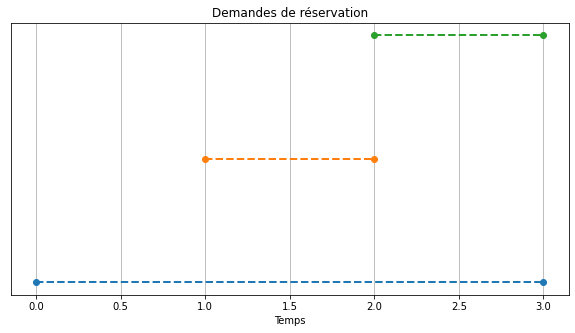

In [7]:
graphique([[0,3],[1,2],[2,3]])

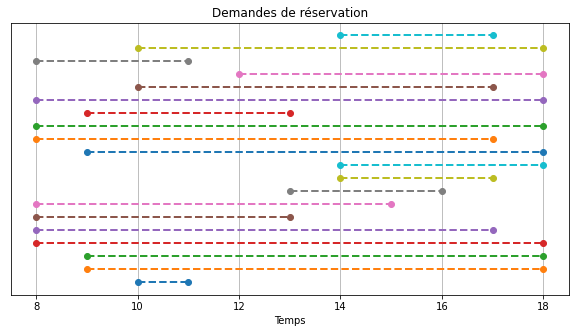

In [112]:
e = echantillon(8, 18, 20)
graphique(e)

In [54]:
def planning_glouton(liste_demande):
    selection = []
    for k in range(len(liste_demande)):
        demande = liste_demande[k]
        debut = demande[0]
        fin = demande[1]
        if (len(selection) > 0):
            fin_preced = selection[len(selection)-1][1]
            if fin_preced <= debut:
                selection.append(demande)
        else:
            selection.append(demande)
    return selection

In [58]:
e = echantillon(8, 18, 20)

In [59]:
e

[[15, 17],
 [14, 18],
 [8, 15],
 [10, 12],
 [8, 17],
 [13, 17],
 [8, 14],
 [8, 11],
 [8, 16],
 [8, 18],
 [9, 12],
 [8, 14],
 [10, 12],
 [9, 10],
 [8, 18],
 [9, 16],
 [9, 11],
 [9, 15],
 [10, 18],
 [8, 10]]

In [60]:
planning_glouton(e)

[[15, 17]]

In [101]:
def clef_tri_fin(demande):
    return (demande[1], demande[0])

Echantillon
[[6, 24], [1, 14], [17, 24], [9, 16], [8, 23], [5, 23], [2, 24], [2, 23], [1, 24], [0, 17]]


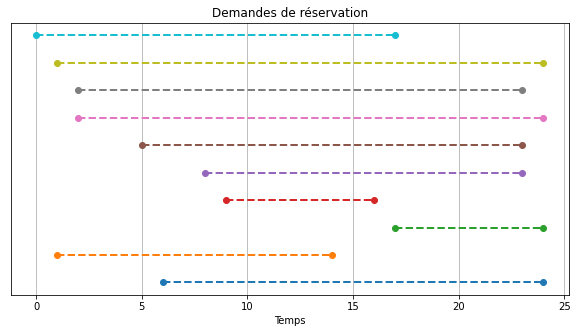

Planning glouton sans tri


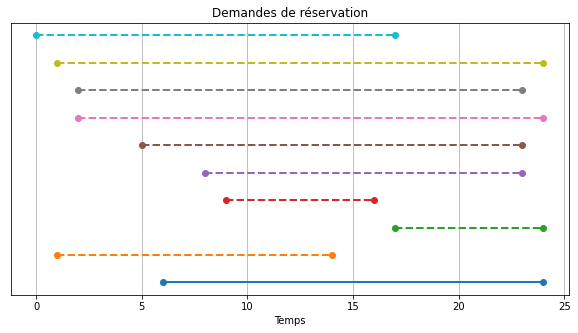

[[6, 24]]
Planning glouton avec tri par début croissant


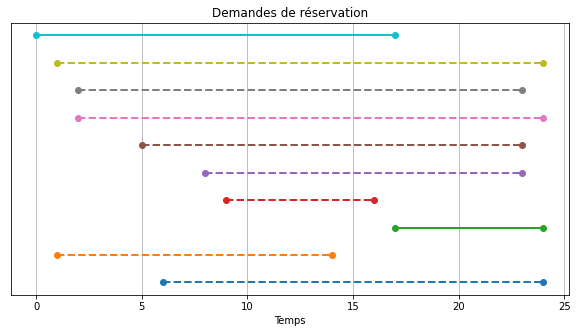

Planning glouton avec tri par fin croissante


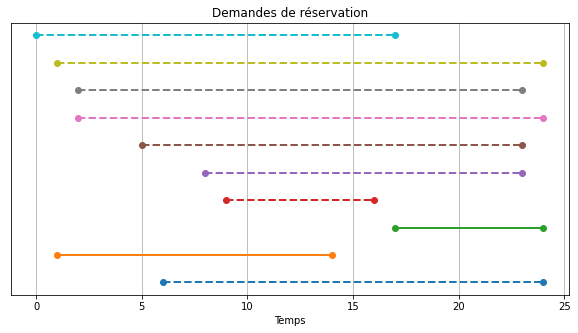

In [108]:
e = echantillon(0, 24, 10)
print("Echantillon")
print(e)
graphique(e)
print("Planning glouton sans tri")
p1 = planning_glouton(e)
graphique(e, p1)
print(p1)
print("Planning glouton avec tri par début croissant")
p2 = planning_glouton(sorted(e))
graphique(e, p2)
print("Planning glouton avec tri par fin croissante")
p3 = planning_glouton(sorted(e, key = clef_tri_fin))
graphique(e, p3)

In [130]:
def comparaison_choix(nb_essais, binf, bsup, nb_demandes):
    fig, ax = plt.subplots(figsize=(10, 5))
    t = []
    tdc = []
    tfc = []
    for _ in range(nb_essais):
        e = echantillon(binf, bsup, nb_demandes)
        p = planning_glouton(e)
        pdc = planning_glouton(sorted(e))
        pfc = planning_glouton(sorted(e, key = clef_tri_fin))
        t.append(len(p))
        tdc.append(len(pdc))
        tfc.append(len(pfc))
    ax.set_title(f"Comparaison d'heuristiques : binf = {binf} | bsup = {bsup} | demandes = {nb_demandes}")
    ax.plot(t, label = 'sans tri', marker='o')
    ax.plot(tdc, label = 'tri début croissant', marker='+')
    ax.plot(tfc, label = 'tri fin croissante', marker='x')
    ax.legend(loc = 'best')
    plt.show()

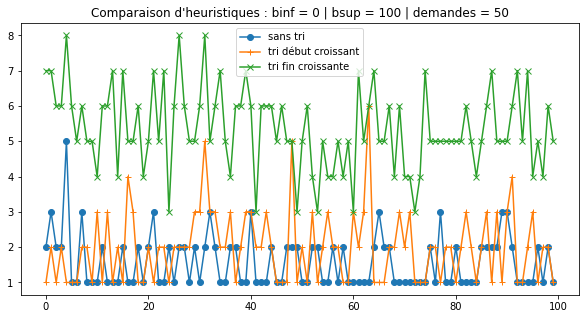

In [131]:
comparaison_choix(100, 0, 100, 50)